In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_graph(eps, n = 100):
    truth = np.ones(n, dtype=bool)
    truth[:int(n/2)] = False
    
    A = np.zeros((n, n))
    p = (1 + eps)/2
    q = (1 - eps)/2
    ## generate within groups
    idx = np.triu_indices(n, k=1, m=None)
    A[idx] = np.random.binomial(1, p, int((n*(n-1)/2)))
    ## generate between groups
    idx1 = [i for i in range(int(n/2))]
    idx2 = [i for i in range(int(n/2), n)]
    A[np.ix_(idx1, idx2)] = np.random.binomial(1, q, int(n*n/4)).reshape((int(n/2), int(n/2)))
    A += A.T
    A[np.diag_indices(4)] = p 
    
    return A, truth
    
def run_eval(A, truth):
    n = A.shape[0]
    M = A - np.ones((n, n))
    _, v = np.linalg.eigh(M)
    vstar = v[:, -1]
    pred = (vstar < 0)    
    n_err = min((pred == truth).sum(), (np.invert(pred) == truth).sum())
    
    return n_err/n

def experiment1(eps):
    A, truth = simulate_graph(eps)
    
    return run_eval(A, truth)

def experiment_multi(eps, ntrial = 200):
    out = [experiment1(eps) for i in range(ntrial)]
    
    return np.mean(out)

In [2]:
## run experiments
err_rate = [experiment_multi(eps) for eps in np.linspace(0, 0.5, num=50)]

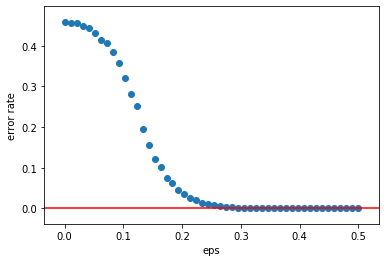

In [3]:
plt.scatter(np.linspace(0, 0.5, num=50), err_rate)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("eps")
plt.ylabel("error rate")
plt.show()